In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re,glob,os

%matplotlib inline

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'

load data

In [2]:
shooting_method_data = np.loadtxt('../data/shooting_method_rho.txt')
sm_z = shooting_method_data[:,0]
sm_rho =shooting_method_data[:,1]
sm_DFT_rho =shooting_method_data[:,2]
sm_MP2_rho =shooting_method_data[:,3]

In [3]:
sm_rho = sm_rho/np.sum(sm_rho*(sm_z[1]-sm_z[0]))
sm_DFT_rho = sm_DFT_rho/np.sum(sm_DFT_rho*(sm_z[1]-sm_z[0]))
sm_MP2_rho = sm_MP2_rho/np.sum(sm_MP2_rho*(sm_z[1]-sm_z[0]))

plotting

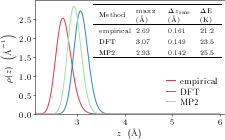

In [39]:
from matplotlib.lines import Line2D

light_purple = '#afa7d0'
light_red = '#eba2a2'

from scipy import interpolate
    
# ---------------------------------------------------------
# ρ(z)    
# ---------------------------------------------------------

colors = ["#d43e4e", "#abdda4", "#3288bc"]

half_max = 0.5*np.max(sm_rho)
half_max_idx = np.where(np.abs(sm_rho-half_max)<0.02)[0]
z_max = sm_z[np.argmax(sm_rho)]

half_max_DFT = 0.5*np.max(sm_DFT_rho)
half_max_idx_DFT = np.where(np.abs(sm_DFT_rho-half_max)<0.02)[0]
z_max_DFT = sm_z[np.argmax(sm_DFT_rho)]

half_max_MP2 = 0.5*np.max(sm_MP2_rho)
half_max_idx_MP2 = np.where(np.abs(sm_MP2_rho-half_max)<0.02)[0]
z_max_MP2 = sm_z[np.argmax(sm_MP2_rho)]

plt.plot(sm_z, sm_rho, lw=1, label="empirical", color = colors[0])
plt.plot(sm_z, sm_DFT_rho, lw=1, label="DFT", color = colors[2])
plt.plot(sm_z, sm_MP2_rho, lw=1, label="MP2", color = colors[1])

#plt.plot([z_max,z_max],[0.00,np.max(sm_rho)], ls=':',color=light_red, lw=0.5)

xmin,xmax=sm_z[half_max_idx[0]],sm_z[half_max_idx[1]]
#plt.plot([zsm_z_max,xmax],[half_max,half_max], ls='--',color=colors[0], lw=0.5)
#plt.text(z_max+0.018,half_max+0.0011,f'{(xmax-xmin)/2:.2f}', fontsize=8, 
#           ha='left',va='top', color=colors[0])

# FWHM arrows
#plt.annotate("",
#        xy=(xmax,half_max), xycoords='data',
#        xytext=(xmax+0.25, half_max), textcoords='data',
#        arrowprops=dict(arrowstyle="->", ls=':',lw=0.5,
#                        connectionstyle="arc3",ec=light_red,zorder=-10),)
#plt.annotate("",
#        xy=(xmin,half_max), xycoords='data',
#        xytext=(xmin-0.25, half_max), textcoords='data',
#        arrowprops=dict(arrowstyle="->", ls=':',lw=0.5,
#                        connectionstyle="arc3",ec=light_red,zorder=-10),)
#plt.annotate(f'{(xmax-xmin):.2f}',
#        xy=(xmin-0.25, half_max), xycoords='data',
#        xytext=(-15, -2.5), textcoords='offset points', color=light_red,zorder=-10)

plt.xlim(2.1,6.1)
plt.ylim(0,2.99)
plt.xlabel(r'$\alabel{z}{\angstrom}$')
plt.ylabel(r'$\alabel{\rho(z)}{\angstrom^{-1}}$')
#plt.text(0,0.99,'(a)', fontsize=7, ha='left',va='top',
#          transform=ax[0].transAxes)
#plt.text(z_max,-0.025,f'{z_max:.2f}', fontsize=8, ha='center',va='top', color=light_red)
plt.locator_params(axis='x', nbins = 4)
plt.legend(handlelength = 1, loc = "lower right")

data = [[ 2.69, 0.026,  21.2],
        [ 3, 0.022,  23.5],
        [ 3,  0.02, 25.5]]

#columns = (r'$\rm Max z / \AA$', r'$\rm variance$', r'$\Delta$E')
#rows = (r'QMC', r"DFT", r"MP2")

#plt.table(cellText=data,colWidths=[0.2,0.2,0.2], fontsize = 12,
#          rowLabels=rows,colLabels=columns,loc='center right')

#col_labels=[r'$\rm max \,$ $z / \rm{\AA}$', r'$\Delta z_{rms} / \rm{\AA}$', r'$\Delta$E / K']
#row_labels=[r'QMC', r'DFT', r'MP2']
#table_vals=[[2.69,0.161,21.2],[3.07,0.149,23.5],[2.93,0.142,25.5]]
#the_table = plt.table(cellText=table_vals,colWidths = [0.22]*3,rowLabels=row_labels,colLabels=col_labels,loc='best')
table = r"\renewcommand{\arraystretch}{1.25}\begin{tabular}{   m{25pt}  m{20pt}  m{20pt}  m{16pt} } \\\hline Method & $\rm{max} \: z$  $ \: (\si{\angstrom})$ & $\Delta z_{\rm{rms}}$ $ \: (\si{\angstrom})$ & $\Delta$E $ \: (\si{\kelvin})$ \\\hline empirical & 2.69 & 0.161 & 21.2 \\ DFT & 3.07 & 0.149 & 23.5 \\  MP2 & 2.93 & 0.142 & 25.5 \\\hline \end{tabular}"
plt.text(3.325,2.3,table,size=7)


plt.savefig('../plots/shooting_method_rho.pdf', dpi=300, transparent=False, bbox_inches ='tight') 
plt.savefig('../plots/shooting_method_rho.svg', bbox_inches ='tight') 
